In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heights.csv')
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [3]:
df.describe()

,height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


In [4]:
Q1=df['height'].quantile(0.25)
Q3=df['height'].quantile(0.75)

In [5]:
Q1

5.25

In [6]:
Q3

6.175

In [7]:
IQR=Q3-Q1

In [8]:
IQR

0.9249999999999998

In [9]:
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)


In [10]:
lower_limit

3.8625000000000003

In [11]:
upper_limit

7.5625

In [12]:
# Outliers are shown below:
df.loc[df['height']<lower_limit]

,name,height
12,yoseph,1.2


In [13]:
df.loc[df['height']>upper_limit]

,name,height
9,imran,14.5


2 outliers occurs:Yoseph(1.2) and Imran(14.5)

In [14]:
final_df=df.loc[(df['height']>lower_limit)&(df['height']<upper_limit)]
final_df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [15]:
df.shape[0]-final_df.shape[0]

2

Here we removed 2 Outliers.Hence proved

{'whiskers': [<matplotlib.lines.Line2D at 0x18ed4a97b00>,
 'caps': [<matplotlib.lines.Line2D at 0x18ed4ad8140>,
 'boxes': [<matplotlib.lines.Line2D at 0x18ed49d34d0>],
 'medians': [<matplotlib.lines.Line2D at 0x18ed4ad86e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18ed4ad89b0>],
 'means': []}

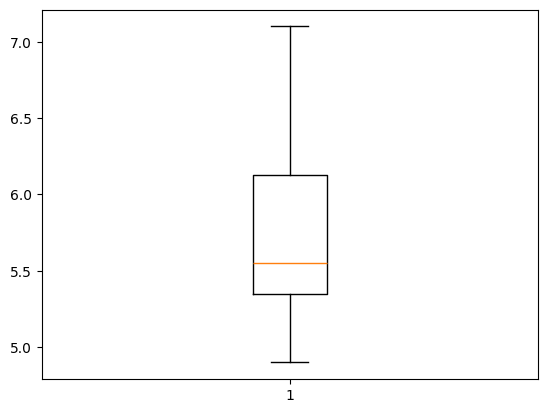

In [16]:
plt.boxplot(final_df['height'])

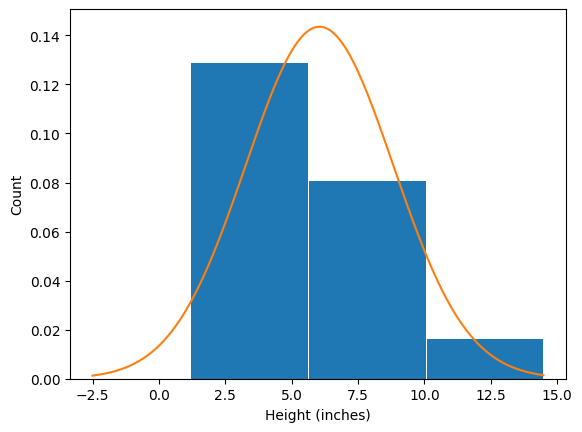

In [17]:
from scipy.stats import norm

plt.hist(df['height'],bins=3,rwidth=0.99,density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
rng=np.arange(-2.5,df['height'].max(),0.01)
plt.plot(rng,norm.pdf(rng,df['height'].mean(),df['height'].std()))

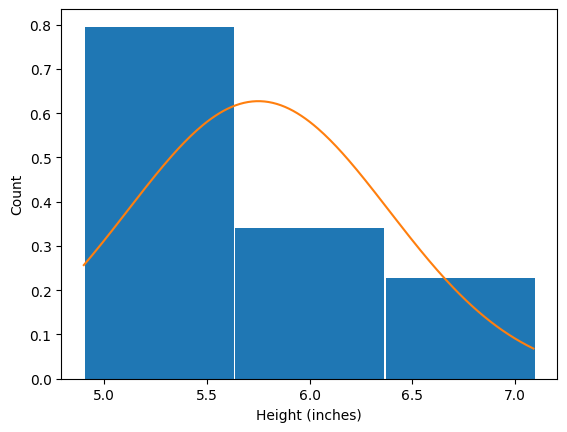

In [19]:
from scipy.stats import norm

plt.hist(final_df['height'],bins=3,rwidth=0.99,density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
rng=np.arange(final_df['height'].min(),final_df['height'].max(),0.01)
plt.plot(rng,norm.pdf(rng,final_df['height'].mean(),final_df['height'].std()))